# Master TIDE - Conférences Python 2020

Francis Wolinski

&copy; 2020 Yotta Conseil


# 4. Graphiques : Matplotlib et Seaborn

Il existe de nombreuses librairies graphiques en Python. la librairie de référence est `matplotlib` qui est un framework graphique à la MATLAB.

Nous utiliserons le sous-module `pyplot` et également la libriarie `seaborn` qui en est une extension.

Documentation :
- matplotlib : http://matplotlib.org
- seaborn : http://seaborn.pydata.org

In [1]:
# import des modules usuels
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# commande magique pour l'affichage des graphiques
%matplotlib inline

# options d'affichage
pd.set_option("display.max_rows", 16)

plt.style.use('seaborn-darkgrid')

## 4.1 Matplotlib.pyplot

[Voir notebook TIDE-04 - matplotlib]

(...)

### 4.1.2 Graphiques standards avec pandas

In [2]:
# chargement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                  index_col="Code INSEE")
geo = geo.sort_index()
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854..."


In [3]:
# chargement de nouvelles données
thd = pd.read_excel('FranceTHD_Open_Data_Observatoire_Juin2015.xlsx',
                       sheet_name="Communes",
                        header=1,
                        index_col="Code INSEE",
                        names=["Département", "Code INSEE", "Commune",
                                "1 Mbit", "3 Mbit", "8 Mbit", "30 Mbit", "100 Mbit",
                                "DSL 1 Mbit", "DSL 3 Mbit", "DSL 8 Mbit", "DSL 30 Mbit", "DSL 100 Mbit",
                                "Câble 1 Mbit", "Câble 3 Mbit", "Câble 8 Mbit", "Câble 30 Mbit", "Câble 100 Mbit",
                                "Fibre 1 Mbit", "Fibre 3 Mbit", "Fibre 8 Mbit", "Fibre 30 Mbit", "Fibre 100 Mbit"])
thd.head()

,Département,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit,DSL 1 Mbit,DSL 3 Mbit,DSL 8 Mbit,...,Câble 1 Mbit,Câble 3 Mbit,Câble 8 Mbit,Câble 30 Mbit,Câble 100 Mbit,Fibre 1 Mbit,Fibre 3 Mbit,Fibre 8 Mbit,Fibre 30 Mbit,Fibre 100 Mbit
Code INSEE,,,,,,,,,,,,,,,,,,,,,
01001,AIN,L'Abergement-Clémenciat,1.000,0.448,0.052,0.000,0.000,1.000,0.448,0.052,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
01002,AIN,L'Abergement-de-Varey,0.676,0.594,0.571,0.571,0.571,0.124,0.024,0.000,...,0.0,0.0,0.0,0.0,0.0,0.571,0.571,0.571,0.571,0.571
01004,AIN,Ambérieu-en-Bugey,1.000,0.966,0.794,0.234,0.000,1.000,0.966,0.794,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
01005,AIN,Ambérieux-en-Dombes,1.000,0.990,0.942,0.667,0.004,1.000,0.985,0.937,...,0.0,0.0,0.0,0.0,0.0,0.004,0.004,0.004,0.004,0.004
01006,AIN,Ambléon,1.000,1.000,1.000,0.934,0.934,1.000,1.000,1.000,...,0.0,0.0,0.0,0.0,0.0,0.934,0.934,0.934,0.934,0.934


Un objet *Series* ou *DataFrame* répond à la méthode **plot()** issue de la librairie *matplotlib.pyplot*.

Il existe diférents types de graphiques disponibles :

Option *kind=...*|Type de graphique
-|-
‘line’|line plot (default)
‘bar’|vertical bar plot
‘barh’|horizontal bar plot
‘hist’|histogram
‘box’|boxplot
‘kde’|Kernel Density Estimation plot (estimation par noyau)
‘density’|same as ‘kde’
‘area’|area plot
‘pie’|pie plot
‘scatter’|scatter plot
'hexbin'|hexagone plot

Voir la documentation : http://pandas.pydata.org/pandas-docs/stable/visualization.html

#### Courbes

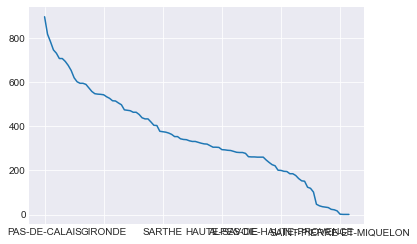

In [9]:
# plot élémentaire
thd["Département"].value_counts().plot();

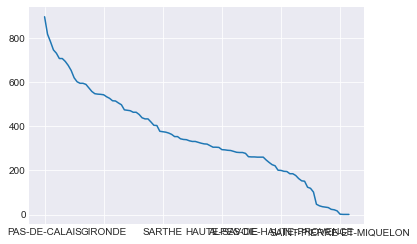

In [8]:
# plot élémentaire
thd["Département"].value_counts().plot()
plt.show()

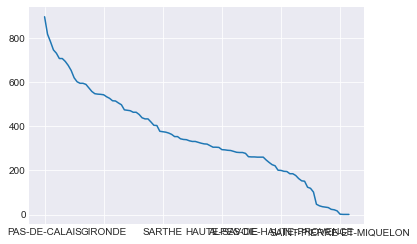

In [10]:
# plot élémentaire
ax = thd["Département"].value_counts().plot()

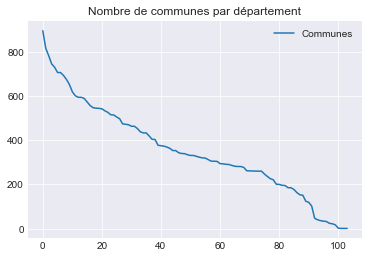

In [11]:
# line plot du nombre de communes par département
s = thd["Département"].value_counts()

ax = s.plot(use_index=None,
            title="Nombre de communes par département")
ax.legend(["Communes"]);

In [13]:
hds

,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit
Code INSEE,,,,,,
92002,Antony,1.0,0.999,0.999,0.996,0.996
92004,Asnières-sur-Seine,1.0,1.000,1.000,0.977,0.977
92007,Bagneux,1.0,0.998,0.980,0.967,0.963
92009,Bois-Colombes,1.0,1.000,1.000,0.993,0.993
92012,Boulogne-Billancourt,1.0,1.000,1.000,0.999,0.927
...,...,...,...,...,...,...
92073,Suresnes,1.0,1.000,1.000,1.000,0.934
92075,Vanves,1.0,1.000,1.000,1.000,1.000
92076,Vaucresson,1.0,1.000,0.999,0.990,0.990


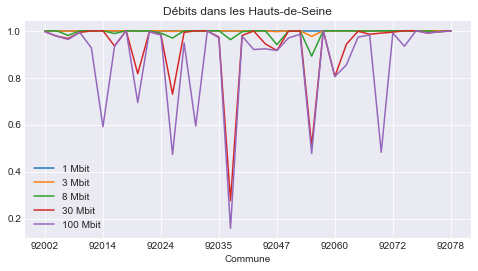

In [12]:
# les taux de 1 à 100 Mbit/s dans les Hauts-de-Seine
hds = thd.loc[thd["Département"] == "HAUTS-DE-SEINE", "Commune":"100 Mbit"]
ax = hds.plot(figsize=(8, 4),
             title="Débits dans les Hauts-de-Seine");
ax.set_xlabel("Commune");

<div class="alert alert-success">
<b>Exercice 1</b>
<ul>
    <li>Modifiez le graphique en rajoutant l'option 'subplots=True'.</li>
    <li>Ajoutez les noms des communes en abscisse avec l'option 'xticks' et la méthode 'set_xticklabels()'.</li>
    <li>Orientez les noms des communes à 60°.</li>
</ul>

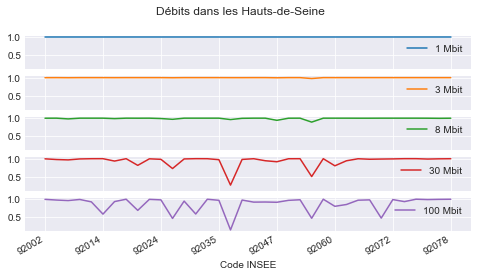

In [16]:
# les taux de 1 à 100 Mbit/s dans les Hauts-de-Seine
hds = thd.loc[thd["Département"] == "HAUTS-DE-SEINE", "Commune":"100 Mbit"]
ax = hds.plot(figsize=(8, 4),
              subplots=True,
              sharey=True,
              title="Débits dans les Hauts-de-Seine");
#ax.set_xlabel("Commune");

#### Barres verticales

In [17]:
# on sélectionne les données de 2 communes avec la méthode isin()
var = thd.loc[thd["Commune"].isin(["Brest", "Rennes"]), "Commune":"100 Mbit"]
var

,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit
Code INSEE,,,,,,
29019,Brest,1.0,0.993,0.982,0.955,0.811
35238,Rennes,1.0,0.998,0.996,0.987,0.986


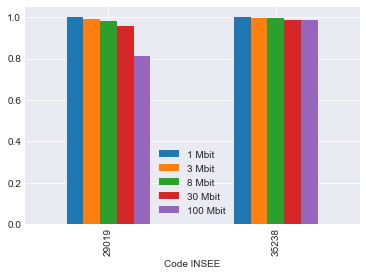

In [18]:
# affichage en barres
var.plot(kind='bar');

<div class="alert alert-success">
<b>Exercice 2</b>
<ul>
    <li>Transposez le DataFrame en ne retenant que les colonnes numériques.</li>
    <li>Obtenez le graphique inverse qui compare deux à deux les débits de chaque ville.</li>
    <li>Mettez la légende à droite à l'extérieur du graphique.</li>
</ul>

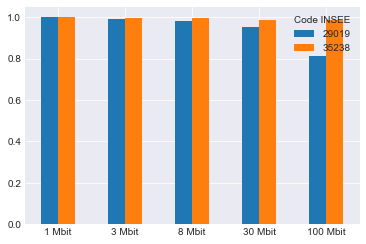

In [22]:
var = thd.loc[thd["Commune"].isin(["Brest", "Rennes"]), "1 Mbit":"100 Mbit"]
var.T.plot(kind='bar', rot=0);

#### Barres horizontales

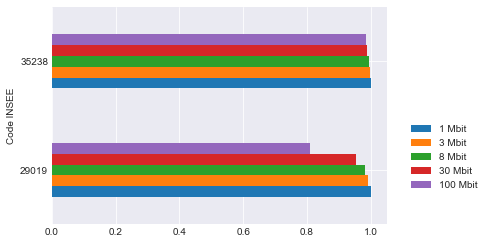

In [24]:
# affichage en barres horizontales
ax = var.plot(kind='barh');
ax.legend(bbox_to_anchor=(1.3, 0.5));

#### Barres empilées

In [25]:
# débits 30 Mbit des 3 technos pour 2 communes
var = thd.loc[thd["Commune"].isin(["Brest", "Rennes"]),
              ["Commune", "DSL 30 Mbit", "Câble 30 Mbit", "Fibre 30 Mbit"]]
var

,Commune,DSL 30 Mbit,Câble 30 Mbit,Fibre 30 Mbit
Code INSEE,,,,
29019,Brest,0.131,0.947,0.239
35238,Rennes,0.193,0.984,0.264


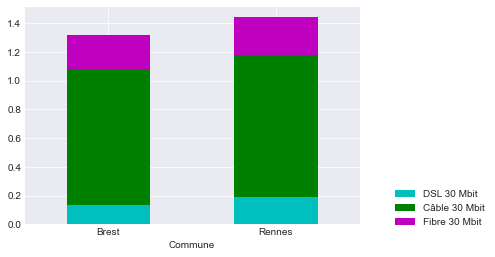

In [26]:
# affichage en barres empilées
ax = var.plot(kind='bar',
              stacked=True,
              color=['c', 'g', 'm'],
              rot=0);
ax.set_xticklabels(var["Commune"])
ax.set_xlabel("Commune")
ax.legend(bbox_to_anchor=(1.4, 0.2));

In [27]:
pd.DataFrame.plot?

#### Secteurs

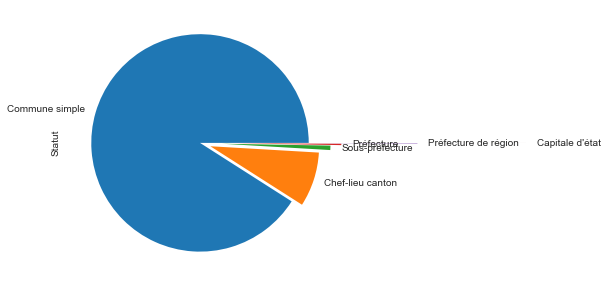

In [28]:
# affichage en secteurs
geo["Statut"].value_counts().plot(figsize=(5, 5),
                                  kind='pie',
                                  explode=(0.0, 0.1, 0.2, 0.3, 1, 2));

### 6.1.3 Graphiques statistiques

#### Histogrammes
On peut passer en revue les différents histogrammes par débit.

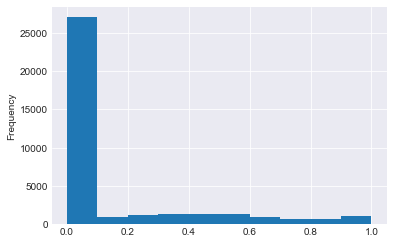

In [29]:
# histogramme
thd["30 Mbit"].plot(kind='hist');  # 1 Mbit, 3 Mbit, 8 Mbit, 30 Mbit, 100 Mbit

Il est possible de modifier la partition qui vaut 10 par défaut.

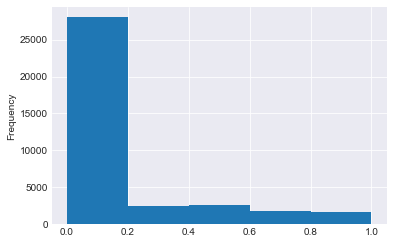

In [30]:
# histogramme
thd["30 Mbit"].plot(kind='hist',
                    bins=5);

#### Boîte à moustaches
Affichage de la médiane, des quartiles et de l'étendue des valeurs.
On peut passer en revue les boites par débit.

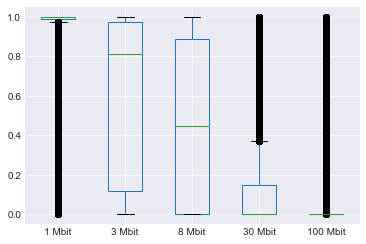

In [31]:
# boite à moustaches du % par débit
thd.loc[:, "1 Mbit":"100 Mbit"].plot(kind='box');

#### Estimateur à noyau
On peut passer en revue les différents noyaux par débit.

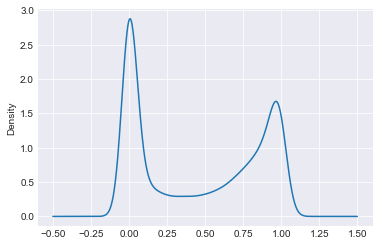

In [32]:
# estimation par noyau du % par débit
thd["8 Mbit"].plot(kind='kde');  # 1 Mbit, 3 Mbit, 8 Mbit, 30 Mbit, 100 Mbit

#### Graphe de retard
Nuage de points d'une séries croisée avec la même série décalée (par défaut de 1). Ce graphe permet de visualiser l'indépendance des valeurs d'une colonne.

On peut afficher les graphes de retard pour les différents débits.

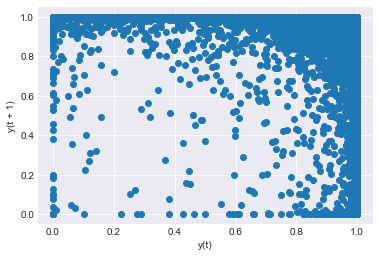

In [33]:
# graphe de retard par débit
from pandas.plotting import lag_plot
lag_plot(thd["1 Mbit"]);

A noter : la méthode **shift()** permet de décaler un objet *Series* ou *DataFrame*.

In [34]:
# colonne Superficie
geo["Superficie"].head()

Code INSEE
01001    1565.0
01002     912.0
01004    2448.0
01005    1605.0
01006     602.0
Name: Superficie, dtype: float64

In [35]:
# colonne Superficie décalée de 1 vers le bas
geo["Superficie"].shift(1).head()

Code INSEE
01001       NaN
01002    1565.0
01004     912.0
01005    2448.0
01006    1605.0
Name: Superficie, dtype: float64

#### Matrices croisées
- Diagonale : histogrammes
- Hors diagonale : nuages de points

On peut tester avec différents départements.

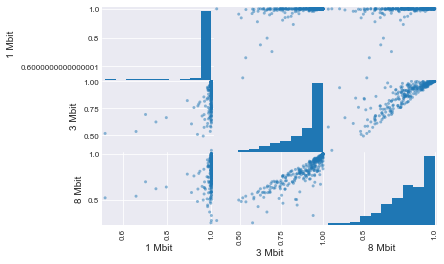

In [36]:
# matrices croisées
from pandas.plotting import scatter_matrix
var = thd.loc[thd["Département"] == "RHONE"]
scatter_matrix(var[["1 Mbit", "3 Mbit", "8 Mbit"]]);

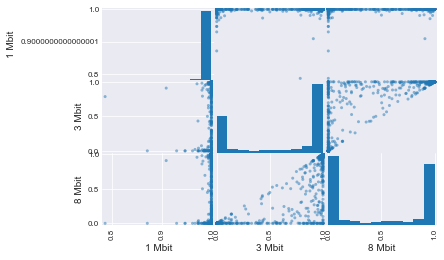

In [37]:
# matrices croisées
var = thd[thd["Département"] == "SOMME"]
scatter_matrix(var[["1 Mbit", "3 Mbit", "8 Mbit"]]);

<div class="alert alert-success">
<b>Exercice 3</b>
<ul>
    <li>Créer un objet *Series* avec le nombre de lettres des noms des communes.</li>
    <li>Etablir un histogramme pour cet objet *Series*.</li>
</ul>

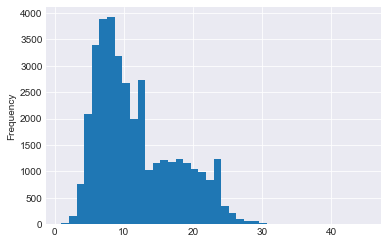

In [44]:
geo['Commune'].str.len().plot(kind='hist', bins=40);

In [45]:
pd.Series.plot?

### 6.1.4 Nuage de points

On peut obtenir un nuage de points entre l'altitude moyenne et la population des communes. On constate que plus une commune a une altitude élevée moins elle a d'habitants.

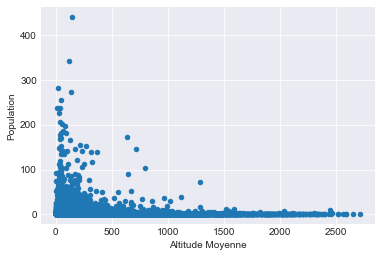

In [46]:
geo.plot(kind='scatter',
       x="Altitude Moyenne",
       y="Population");

### 4.1.5 Cartes (approche naïve)

Puisque nous avons extrait la longitude et la latitude des données par commune. Il est possible de faire un graphique avec les points géométriques de chaque commune.

In [48]:
geo['Superficie'] /= 100
geo['Densité'] = geo['Population'] * 1000 / geo['Superficie']
geo[['Latitude', 'Longitude']] = geo['geo_point_2d'].str.extract('(.*), (.*)').astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Densité,Latitude,Longitude
Code INSEE,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,0.1565,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",5111.821086,46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,0.0912,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",2192.982456,46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,0.2448,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",54738.562092,45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,0.1605,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",9968.847352,45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,0.0602,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",1661.129568,45.749499,5.594320


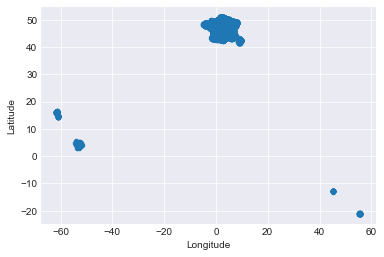

In [49]:
# nuage de points avec les coordonnées géographiques
geo.plot(kind='scatter', x="Longitude", y="Latitude");

On obtient une carte de France avec les DOM.

<div class="alert alert-success">
<b>Exercice 4</b>
<ul>
    <li>Cherchez une condition pour n'afficher que la France métropolitaine (plusieurs solutions possibles).</li>
</ul>
</div>

In [51]:
metro = geo.loc[geo['Longitude'].abs() < 20]

In [53]:
metro = geo.loc[geo['Latitude'] > 40]

In [55]:
metro = geo.loc[geo['Code Postal'] < '96']

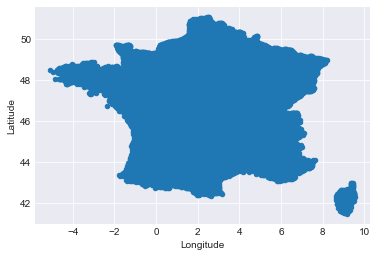

In [56]:
# affichage de metro
metro.plot(kind='scatter', x="Longitude", y="Latitude");

N.B. : Il existe des données cartographiques opendata utilisables en Python.

Voir Basemap : http://matplotlib.org/basemap/users/intro.html

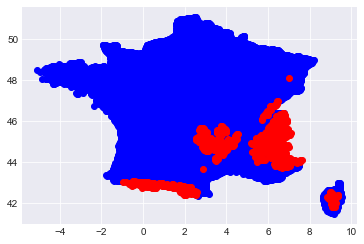

In [57]:
# zones de couleurs différentes
metro1 = metro.loc[metro["Altitude Moyenne"] <= 1000]
metro2 = metro.loc[metro["Altitude Moyenne"] > 1000]
plt.scatter(metro1["Longitude"], metro1["Latitude"], color='blue')
plt.scatter(metro2["Longitude"], metro2["Latitude"], color='red');

**Remarque**

Il existe dans *matplotlib* (et *seaborn*) un système de palettes de couleurs :

- matplotlib : http://matplotlib.org/users/colormaps.html

- seaborn : http://seaborn.pydata.org/tutorial/color_palettes.html

Les librairies gèrent également :

- Les palettes de couleurs de **ColorBrewer** : http://colorbrewer2.org

- Les 954 couleurs nommées de manière participative par l'initiative **xkcd** : https://xkcd.com/color/rgb/ (Voir également la représentation graphique : http://www.luminoso.com/colors/).

L'altitude avec un nuancier bleu.

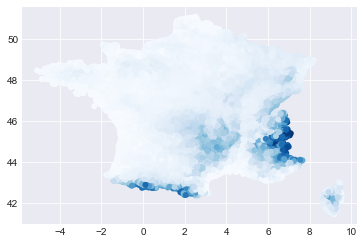

In [58]:
# nuancier bleu
plt.scatter(metro["Longitude"],
            metro["Latitude"],
            c=metro["Altitude Moyenne"],
            cmap=plt.cm.Blues,
            edgecolors='none');

En fait, les points sont dessinés dans l'ordre du *DataFrame*. Donc de petites valeurs affichées en clair peuvent venir effacer des valeurs plus grandes affichées en foncé.

On peut corriger le problème en triant préalablement avec la colonne représentant l'intensité de la couleur.

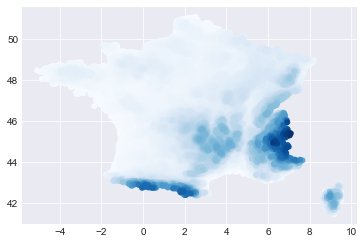

In [59]:
# nuancier bleu avec tri des valeurs
metro2 = metro.sort_values("Altitude Moyenne")
plt.scatter(metro2["Longitude"],
            metro2["Latitude"],
            c=metro2["Altitude Moyenne"],
            cmap=plt.cm.Blues,
            edgecolors='none');

Utilisation de la palette *Spectral* inversée et ajout d'un nuancier.

N.B. : pour chaque palette, son inverse est obtenu avec le suffixe "*_r*"

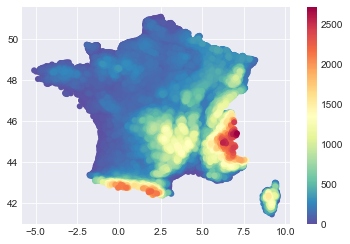

In [60]:
# on utilise plt.cm.Spectral_r
ax = plt.scatter(x=metro2["Longitude"],
            y=metro2["Latitude"],
            c=metro2["Altitude Moyenne"],
            cmap=plt.cm.Spectral_r,
            edgecolors='none')
plt.colorbar(ax);

In [61]:
# terminaisons fréquentes
res = geo["Commune"].str.extract("(-[^-]+-[^-]+)$", expand=False)
res.dropna().value_counts().head(16)

-SUR-MER         100
-SUR-SEINE        71
-SUR-LOIRE        70
-LES-BAINS        60
-LE-CHATEAU       56
-SUR-MARNE        56
-LE-GRAND         47
-AUX-BOIS         46
-LE-SEC           45
-SUR-MEUSE        43
-LA-VILLE         43
-SAINT-MARTIN     42
-LA-FORET         38
-EN-BRIE          37
-LE-PETIT         35
-DES-BOIS         34
Name: Commune, dtype: int64

<div class="alert alert-success">
<b>Exercice 5</b>
<ul>
    <li>Ecrire une fonction qui affiche une carte de France mettant en exergue les communes se terminant par deux mots séparés par des tirets.</li>
    <li>Exemples :</li>
    <ul>
    <li>show(metro, "SUR", "MER")</li>
    <li>show(metro, "SUR", "SEINE")</li>
    <li>show(metro, "LES", "BAINS")</li>
    </ul>
</ul>
</div>

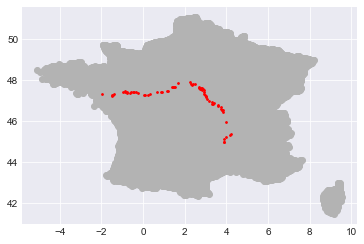

In [70]:
def show(metro, mot1, mot2):
    plt.scatter(metro["Longitude"], metro["Latitude"], color='0.7')
    #selection = metro.loc[metro['Commune'].str.endswith('-'+mot1+'-'+mot2)]
    selection = metro.loc[metro['Commune'].str.endswith(f'-{mot1}-{mot2}')]
    plt.scatter(selection["Longitude"], selection["Latitude"],
                color='r',
                s=3)

show(metro, "SUR", "LOIRE")

<div class="alert alert-success">
<b>Exercice 6</b>
<ul>
    <li>Sélectionner dans 2 sous-dataframes les villes de statut au moins "Préfecture" et les autres villes.</li>
    <li>Afficher les autres villes dans une couleur uniforme.</li>
    <li>Trier les villes de statut au moins "Préfecture" selon la "Population" décroissante et les représenter avec un cercle proportionnel à la "Population' (option *s=...*) et dans une couleur égale à la "Densité".</li>
</ul>
</div>

In [74]:
from pandas.api.types import CategoricalDtype
statuts = ['Commune simple', 'Chef-lieu canton', 'Sous-préfecture',
       'Préfecture', 'Préfecture de région', "Capitale d'état"]
cat_statut = CategoricalDtype(categories=statuts, ordered=True)
geo["Statut"] = geo["Statut"].astype(cat_statut)

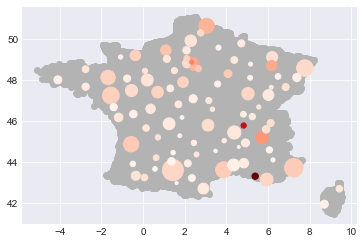

In [80]:
plt.scatter(metro["Longitude"], metro["Latitude"], color='0.7')
selection = metro.loc[geo["Statut"] >= 'Préfecture']
selection = selection.sort_values('Population', ascending=False)
plt.scatter(selection["Longitude"], selection["Latitude"],
            c=selection["Densité"],
            cmap=plt.cm.Reds,
            s=selection["Population"]);

<div class="alert alert-success">
<b>Questions</b>
<ul>
    <li>Pourquoi le cercle le plus large représente la ville de Toulouse ?</li>
    <li>Aide : rechercher les Communes qui contiennent le mot "ARRONDISSEMENT".</li>
</ul>
</div>

In [81]:
geo.loc[geo['Commune'].str.contains("ARRONDISSEMENT")]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Densité,Latitude,Longitude
Code INSEE,,,,,,,,,,,,,
13201,13001,MARSEILLE--1ER-ARRONDISSEMENT,BOUCHES-DU-RHONE,PROVENCE-ALPES-COTE D'AZUR,Préfecture de région,29.0,0.0178,40.9,"43.2999009436, 5.38227869795","{""type"": ""Polygon"", ""coordinates"": [[[5.372144...",2.297753e+06,43.299901,5.382279
13202,13002,MARSEILLE--2E--ARRONDISSEMENT,BOUCHES-DU-RHONE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,6.0,0.0364,25.7,"43.3126964178, 5.36364983265","{""type"": ""Polygon"", ""coordinates"": [[[5.373616...",7.060440e+05,43.312696,5.363650
13203,13003,MARSEILLE--3E--ARRONDISSEMENT,BOUCHES-DU-RHONE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,25.0,0.0254,45.4,"43.3121200046, 5.38010981423","{""type"": ""Polygon"", ""coordinates"": [[[5.375021...",1.787402e+06,43.312120,5.380110
13204,13004,MARSEILLE--4E--ARRONDISSEMENT,BOUCHES-DU-RHONE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,58.0,0.0288,47.1,"43.306733355, 5.40087488752","{""type"": ""Polygon"", ""coordinates"": [[[5.408970...",1.635417e+06,43.306733,5.400875
13205,13005,MARSEILLE--5E--ARRONDISSEMENT,BOUCHES-DU-RHONE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,35.0,0.0218,44.5,"43.2928061953, 5.3975770959","{""type"": ""Polygon"", ""coordinates"": [[[5.391944...",2.041284e+06,43.292806,5.397577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75116,75016,PARIS-16E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,43.0,0.1641,169.4,"48.8603987604, 2.2620995594","{""type"": ""Polygon"", ""coordinates"": [[[2.262784...",1.032297e+06,48.860399,2.262100
75117,75017,PARIS-17E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,40.0,0.0563,168.5,"48.8873371665, 2.30748555949","{""type"": ""Polygon"", ""coordinates"": [[[2.295145...",2.992895e+06,48.887337,2.307486
75118,75018,PARIS-18E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,Chef-lieu canton,57.0,0.0604,200.6,"48.8927350746, 2.34871193387","{""type"": ""Polygon"", ""coordinates"": [[[2.327115...",3.321192e+06,48.892735,2.348712


## 6.2 Seaborn

Seaborn est une extension de matplotlib qui définit une vingtaine de graphiques pour illustrer des distributions, des régressions, des représentations catégorielles, des matrices et des séries temporelles.

Nous allons étudier quelques graphiques.

### 6.2.1 barplot

Show point estimates and confidence intervals as rectangular bars.

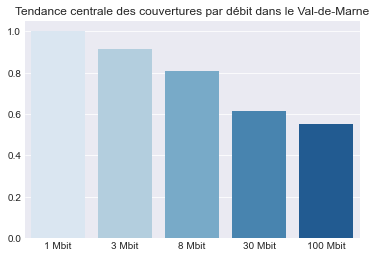

In [83]:
import seaborn as sns

# seaborn barplot
val = thd.loc[thd["Département"] == "VAL-DE-MARNE", "1 Mbit":"100 Mbit"]
g = sns.barplot(data=val, palette="Blues", ci=None)
g.axes.set_title('Tendance centrale des couvertures par débit dans le Val-de-Marne');

### 6.2.2 countplot

Show the counts of observations in each categorical bin using bars.

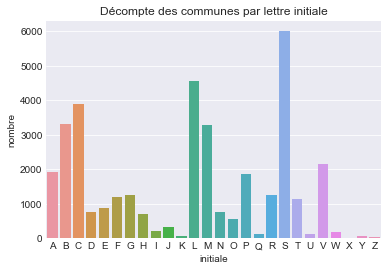

In [85]:
# seaborn countplot
geo.sort_values("Commune", inplace=True)
geo["initiale"] = geo["Commune"].apply(lambda x: x[0])
g = sns.countplot(data=geo, x="initiale")
g.axes.set_ylabel('nombre')
g.axes.set_title('Décompte des communes par lettre initiale');

### 6.2.3 distplot + kdeplot

Flexibly plot a univariate distribution of observations.

+ **kdeplot** Fit and plot a univariate or bivariate kernel density estimate.

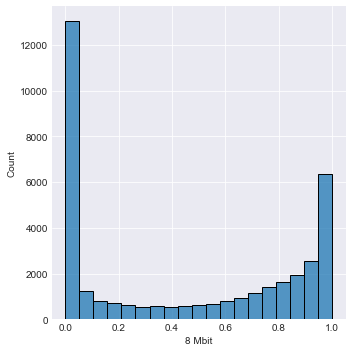

In [86]:
# seaborn distplot
sns.displot(x="8 Mbit", data=thd);

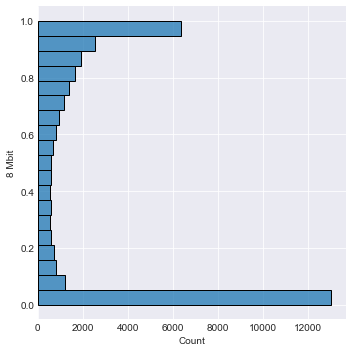

In [87]:
# seaborn distplot
sns.displot(y="8 Mbit", data=thd);

### 6.2.4 distplot + rugplot

Flexibly plot a univariate distribution of observations.

+ **rugplot** Plot datapoints in an array as sticks on an axis.

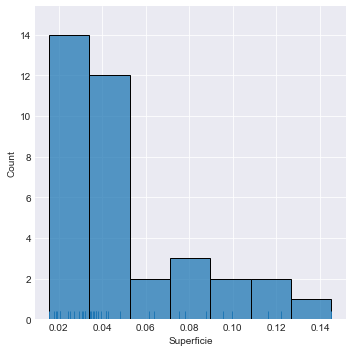

In [88]:
# seaborn distplot
var = geo.loc[geo['Département'] == 'HAUTS-DE-SEINE']
sns.displot(x="Superficie", data=var, rug=True);

### 6.2.5 violinplot

Draw a combination of boxplot and kernel density estimate.

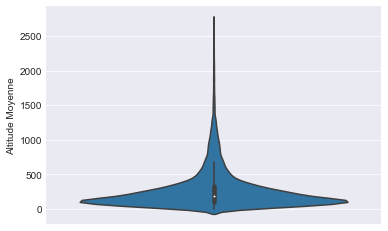

In [90]:
# seaborn violinplot
sns.violinplot(y="Altitude Moyenne", data=geo);

### 6.2.6 regplot

Plot data and a linear regression model fit.

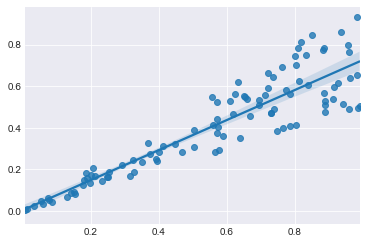

In [91]:
# seaborn regplot
x = np.random.random(100)
y = x * (1 + np.random.random(100)) / 2
sns.regplot(x=x, y=y);

In [95]:
from scipy.stats import linregress

linregress(x, y)

LinregressResult(slope=0.7218613041550258, intercept=0.0041154385558753726, rvalue=0.9081251813052011, pvalue=7.807635197838904e-39, stderr=0.033619920689397495)

In [96]:
s, i, r, p, std = linregress(x, y)
s, i, r, p, std

(0.7218613041550258,
 0.0041154385558753726,
 0.9081251813052011,
 7.807635197838904e-39,
 0.033619920689397495)

### 6.2.7 stripplot

Draw a scatterplot where one variable is categorical.

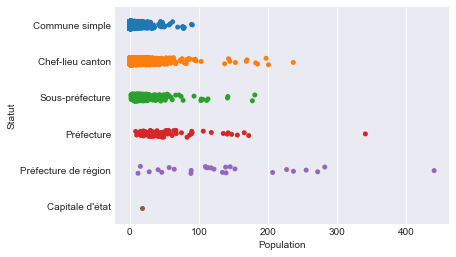

In [100]:
# seaborn stripplot
sns.stripplot(x="Population", y="Statut", data=geo);

### 6.2.8 heatmap

Plot rectangular data as a color-encoded matrix.

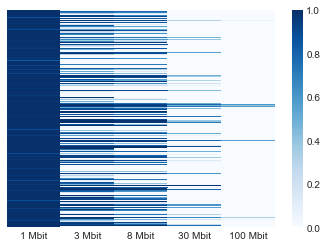

In [101]:
# seaborn heatmap
var = thd.loc[thd["Département"] == "CANTAL"]
g = sns.heatmap(data=var.loc[:, "1 Mbit":"100 Mbit"], cmap='Blues')
g.set_yticks([])
g.set_ylabel('');

<div class="alert alert-success">
<b>Exercice 7</b>
<ul>
    <li>Afficher une carte de chaleur avec les corrélations du *DataFrame* thd.</li>
    <li>Ajouter des lignes blanches horizontales et verticales séparant les technologies.</li>
</ul>
</div>

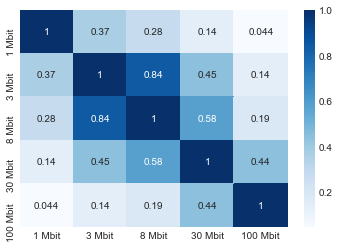

In [110]:
sns.heatmap(data=thd.loc[:, "1 Mbit":"100 Mbit"].corr(),
            annot=True,
            cmap='Blues');

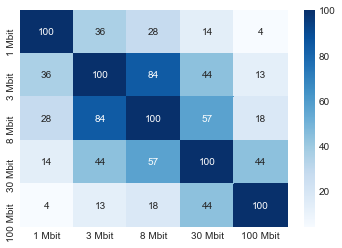

In [121]:
sns.heatmap(data=(thd.loc[:, "1 Mbit":"100 Mbit"].corr()*100).astype(int),
            annot=True,
            fmt='d',
            cmap='Blues');

In [ ]:
# exercice
# THD sélectionner les communes qui commencent par la lettre "A"

In [126]:
thd.loc[thd['Commune'].str.startswith('A', na=False)]

,Département,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit,DSL 1 Mbit,DSL 3 Mbit,DSL 8 Mbit,...,Câble 1 Mbit,Câble 3 Mbit,Câble 8 Mbit,Câble 30 Mbit,Câble 100 Mbit,Fibre 1 Mbit,Fibre 3 Mbit,Fibre 8 Mbit,Fibre 30 Mbit,Fibre 100 Mbit
Code INSEE,,,,,,,,,,,,,,,,,,,,,
01004,AIN,Ambérieu-en-Bugey,1.000,0.966,0.794,0.234,0.000,1.000,0.966,0.794,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
01005,AIN,Ambérieux-en-Dombes,1.000,0.990,0.942,0.667,0.004,1.000,0.985,0.937,...,0.0,0.0,0.0,0.0,0.0,0.004,0.004,0.004,0.004,0.004
01006,AIN,Ambléon,1.000,1.000,1.000,0.934,0.934,1.000,1.000,1.000,...,0.0,0.0,0.0,0.0,0.0,0.934,0.934,0.934,0.934,0.934
01007,AIN,Ambronay,0.973,0.779,0.772,0.713,0.713,0.778,0.066,0.059,...,0.0,0.0,0.0,0.0,0.0,0.713,0.713,0.713,0.713,0.713
01008,AIN,Ambutrix,1.000,0.557,0.013,0.000,0.000,1.000,0.557,0.013,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95040,VAL-D'OISE,Avernes,0.989,0.011,0.000,0.000,0.000,0.989,0.011,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
97102,GUADELOUPE,Anse-Bertrand,0.982,0.684,0.585,0.029,0.000,0.982,0.684,0.585,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
97360,GUYANE,Apatou,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000


In [132]:
thd['Commune'].apply(type).value_counts()

<class 'str'>     36691
<class 'bool'>        2
Name: Commune, dtype: int64

In [133]:
thd.loc[(thd['Commune']==True)|(thd['Commune']==False)]

,Département,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit,DSL 1 Mbit,DSL 3 Mbit,DSL 8 Mbit,...,Câble 1 Mbit,Câble 3 Mbit,Câble 8 Mbit,Câble 30 Mbit,Câble 100 Mbit,Fibre 1 Mbit,Fibre 3 Mbit,Fibre 8 Mbit,Fibre 30 Mbit,Fibre 100 Mbit
Code INSEE,,,,,,,,,,,,,,,,,,,,,
08165,ARDENNES,False,1.0,0.800,0.000,0.0,0.0,1.0,0.800,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24177,DORDOGNE,False,1.0,0.994,0.991,0.0,0.0,1.0,0.994,0.991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
isinstance('1', int)

False

In [136]:
thd.loc[thd['Commune'].apply(lambda x: isinstance(x, bool))]

,Département,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit,DSL 1 Mbit,DSL 3 Mbit,DSL 8 Mbit,...,Câble 1 Mbit,Câble 3 Mbit,Câble 8 Mbit,Câble 30 Mbit,Câble 100 Mbit,Fibre 1 Mbit,Fibre 3 Mbit,Fibre 8 Mbit,Fibre 30 Mbit,Fibre 100 Mbit
Code INSEE,,,,,,,,,,,,,,,,,,,,,
08165,ARDENNES,False,1.0,0.800,0.000,0.0,0.0,1.0,0.800,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24177,DORDOGNE,False,1.0,0.994,0.991,0.0,0.0,1.0,0.994,0.991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
thd.loc[thd['Commune'].apply(type)==bool]

,Département,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit,DSL 1 Mbit,DSL 3 Mbit,DSL 8 Mbit,...,Câble 1 Mbit,Câble 3 Mbit,Câble 8 Mbit,Câble 30 Mbit,Câble 100 Mbit,Fibre 1 Mbit,Fibre 3 Mbit,Fibre 8 Mbit,Fibre 30 Mbit,Fibre 100 Mbit
Code INSEE,,,,,,,,,,,,,,,,,,,,,
08165,ARDENNES,False,1.0,0.800,0.000,0.0,0.0,1.0,0.800,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24177,DORDOGNE,False,1.0,0.994,0.991,0.0,0.0,1.0,0.994,0.991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
thd.loc[thd['Commune'].apply(lambda x: isinstance(x, bool)), 'Commune']='Faux'

In [145]:
thd.loc[thd['Commune'].apply(lambda x: isinstance(x, bool))]

,Département,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit,DSL 1 Mbit,DSL 3 Mbit,DSL 8 Mbit,...,Câble 1 Mbit,Câble 3 Mbit,Câble 8 Mbit,Câble 30 Mbit,Câble 100 Mbit,Fibre 1 Mbit,Fibre 3 Mbit,Fibre 8 Mbit,Fibre 30 Mbit,Fibre 100 Mbit
Code INSEE,,,,,,,,,,,,,,,,,,,,,


In [147]:
thd.loc[thd['Commune'].str.startswith('Fau')]

,Département,Commune,1 Mbit,3 Mbit,8 Mbit,30 Mbit,100 Mbit,DSL 1 Mbit,DSL 3 Mbit,DSL 8 Mbit,...,Câble 1 Mbit,Câble 3 Mbit,Câble 8 Mbit,Câble 30 Mbit,Câble 100 Mbit,Fibre 1 Mbit,Fibre 3 Mbit,Fibre 8 Mbit,Fibre 30 Mbit,Fibre 100 Mbit
Code INSEE,,,,,,,,,,,,,,,,,,,,,
02301,AISNE,Faucoucourt,0.986,0.671,0.000,0.0,0.0,0.986,0.671,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04085,ALPES-DE-HAUTE-PROVENCE,Faucon-du-Caire,0.865,0.000,0.000,0.0,0.0,0.865,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04086,ALPES-DE-HAUTE-PROVENCE,Faucon-de-Barcelonnette,1.000,0.534,0.386,0.0,0.0,1.000,0.534,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07088,ARDECHE,Faugères,1.000,0.000,0.000,0.0,0.0,1.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08165,ARDENNES,Faux,1.000,0.800,0.000,0.0,0.0,1.000,0.800,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82059,TARN-ET-GARONNE,Faudoas,0.957,0.012,0.000,0.0,0.0,0.957,0.012,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82060,TARN-ET-GARONNE,Fauroux,0.798,0.070,0.008,0.0,0.0,0.798,0.070,0.008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84045,VAUCLUSE,Faucon,1.000,0.892,0.305,0.0,0.0,1.000,0.892,0.305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
